## Three Observations 

1) Through the combination of data we can see the distribution of male and female mice through each drug that was given to them to see if theres a differnece in affect for different genders 

2. The drug, Propriva, may not be accepting in female gendered species such as humans since the mouse on the medicine is not effective in females at least female mice species since the mices tumar still continued to grow over time.

3) The amount of mice tested might have a similar or not same amount of similar test results during their test since some drugs over time have similar numbers of test mice but without a specific number of test mice for each gender the test might may vary if not treated equal across the border to see how each drug treat each gender.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [6]:
study_results_path = 'C:/Users/Molin/Downloads/M5_Code/Starter_Code/Pymaceuticals/data/study_results.csv'
mouse_metadata_path = 'C:/Users/Molin/Downloads/M5_Code/Starter_Code/Pymaceuticals/data/mouse_metadata.csv'
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [19]:
combined_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')

combined_data = combined_data[study_results.columns.tolist() + [col for col in mouse_metadata.columns if col != 'Mouse ID']]
print(combined_data.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [20]:
num_mice = combined_data['Mouse ID'].nunique()
print(f"Number of unique mice: {num_mice}")

Number of unique mice: 249


In [23]:
specific_id = combined_data[combined_data['Mouse ID'] == 'g989']
print(specific_id)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294        

In [25]:
cleaned_data = combined_data[combined_data['Mouse ID'] != 'g989']
print(cleaned_data.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [26]:
summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance=lambda x: x.var(),
    std_dev='std',
    SEM=lambda x: x.sem()
).reset_index()
print(summary_stats)

  Drug Regimen       mean     median   variance   std_dev       SEM
0    Capomulin  40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva  52.322552  50.854632  42.351070  6.507770  0.512884
7     Ramicane  40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355  6.966589  0.516398


In [27]:
summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    ['mean', 'median', 'var', 'std', 'sem']
).rename(columns={'var': 'variance', 'std': 'standard deviation', 'sem': 'SEM'})
print(summary_stats)

                   mean     median   variance  standard deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## BAR AND PIE CHARTS

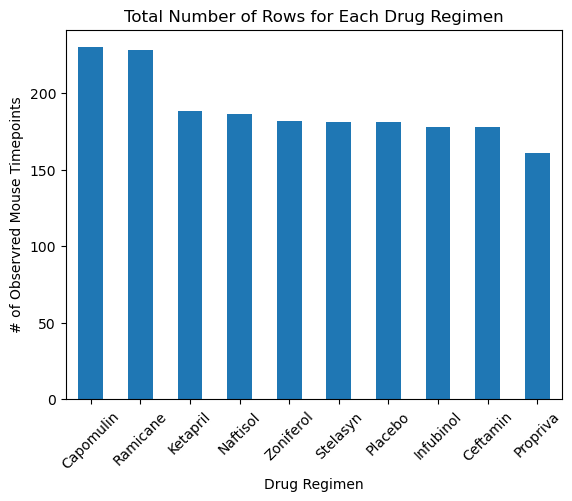

In [29]:
regimen_counts = combined_data['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', title="Total Number of Rows for Each Drug Regimen", xlabel="Drug Regimen", ylabel="# of Observred Mouse Timepoints", rot=45)
plt.show()

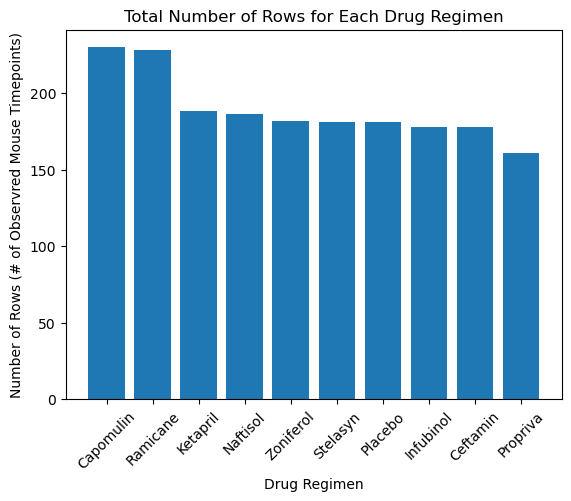

In [33]:
regimen_counts = combined_data['Drug Regimen'].value_counts()
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")
plt.xticks(rotation=45)
plt.show()

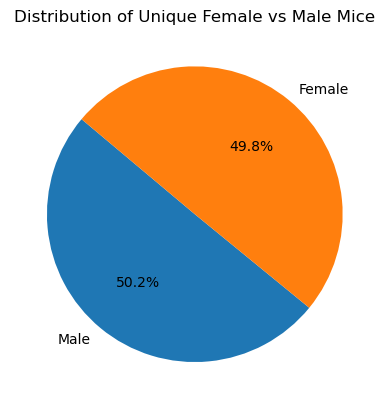

In [36]:
unique_mice = combined_data.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]
gender_counts = unique_mice['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, title="Distribution of Unique Female vs Male Mice")
plt.ylabel('')
plt.show()

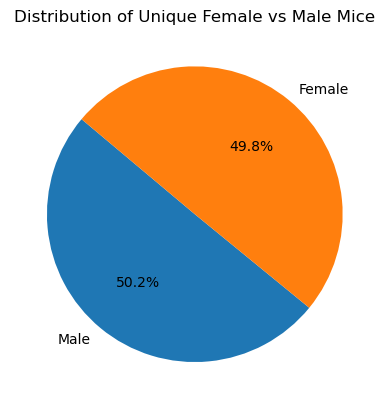

In [38]:
unique_mice = combined_data.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]
gender_counts = unique_mice['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Unique Female vs Male Mice")
plt.show()

## Quartlies, Outliners and Boxplots

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\Molin\AppData\Local\Temp\ipykernel_2224\230652600.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data.values(), labels=tumor_vol_data.keys())


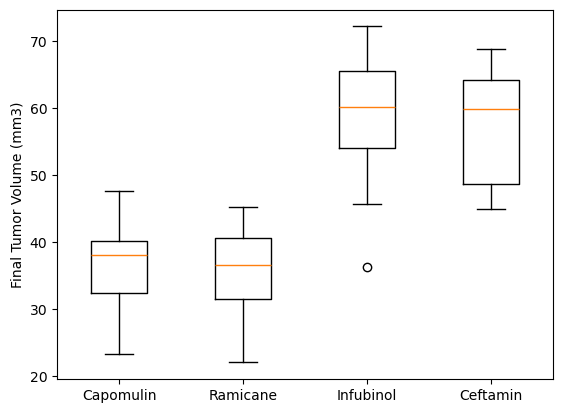

In [42]:
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
last_timepoints = combined_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
final_tumor_volumes = pd.merge(last_timepoints, combined_data, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volumes = final_tumor_volumes[final_tumor_volumes['Drug Regimen'].isin(selected_regimens)]
tumor_vol_data = {regimen: final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
                  for regimen in selected_regimens}
for regimen, volumes in tumor_vol_data.items():
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]
    
    print(f"{regimen}'s potential outliers: {outliers}")

plt.boxplot(tumor_vol_data.values(), labels=tumor_vol_data.keys())
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

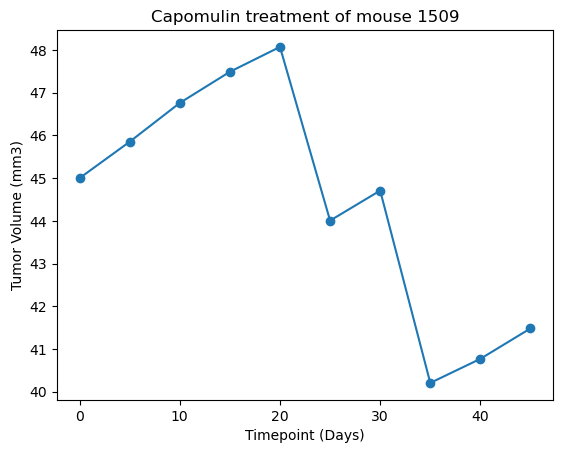

In [45]:
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509']
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse 1509")
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

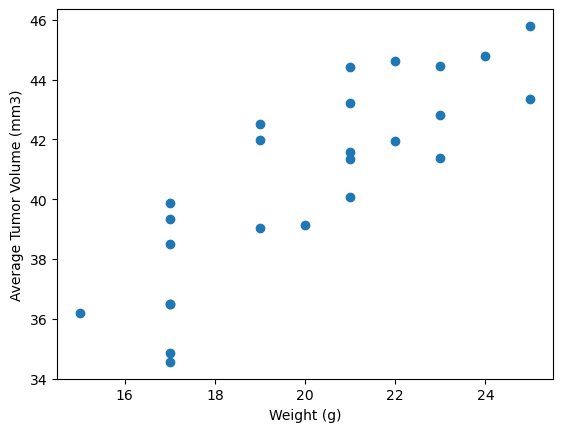

In [48]:
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID').agg(
    Avg_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Mouse_Weight=('Weight (g)', 'first')
).reset_index()
plt.scatter(avg_tumor_volume['Mouse_Weight'], avg_tumor_volume['Avg_Tumor_Volume'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

Correlation coefficient between mouse weight and average tumor volume: 0.8419363424694722


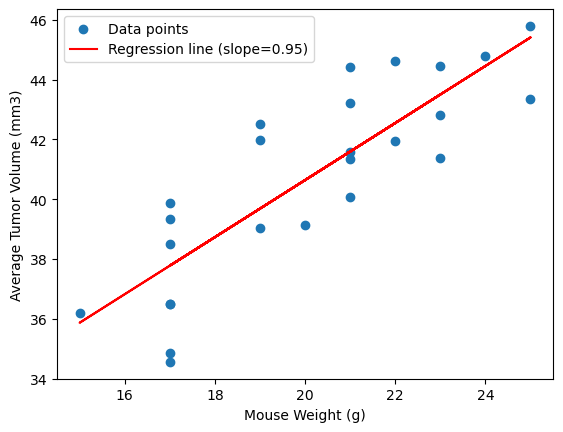

In [52]:
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']


avg_tumor_volume = capomulin_data.groupby('Mouse ID').agg(
    Avg_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Mouse_Weight=('Weight (g)', 'first')  # Assume weight is constant for each mouse
).reset_index()


correlation = avg_tumor_volume['Mouse_Weight'].corr(avg_tumor_volume['Avg_Tumor_Volume'])
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation}")


slope, intercept, r_value, p_value, std_err = linregress(
    avg_tumor_volume['Mouse_Weight'], avg_tumor_volume['Avg_Tumor_Volume']
)


regress_values = avg_tumor_volume['Mouse_Weight'] * slope + intercept


plt.scatter(avg_tumor_volume['Mouse_Weight'], avg_tumor_volume['Avg_Tumor_Volume'], label='Data points')
plt.plot(avg_tumor_volume['Mouse_Weight'], regress_values, color='red', label=f'Regression line (slope={slope:.2f})')


plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()


plt.show()
